In [52]:
import datasets
import numpy as np
import pandas as pd



In [53]:

df = pd.read_csv('newsapi_cleaned_data2.csv')


In [54]:
df.columns

Index(['Unnamed: 0', 'source', 'title', 'description', 'publishedAt',
       'content', 'labels', 'clean', 'tokenized', 'nonstop', 'stemmed',
       'lemmatized'],
      dtype='object')

In [55]:
df=df.drop(['Unnamed: 0','source', 'title', 'description', 
       'publishedAt', 'content','clean', 'tokenized', 'nonstop','stemmed',],axis=1)
df.columns

Index(['labels', 'lemmatized'], dtype='object')

In [56]:
df.head

<bound method NDFrame.head of             labels                                         lemmatized
0    ENTERTAINMENT  ['youre', 'finally', 'ready', 'create', 'home'...
1    ENTERTAINMENT  ['sept', 'reuters', 'star', 'entertainment', '...
2    ENTERTAINMENT  ['sept', 'reuters', 'antihero', 'stepped', 'sp...
3    ENTERTAINMENT  ['hong', 'kong', 'sept', 'reuters', 'china', '...
4    ENTERTAINMENT  ['reuters', 'levine', 'plotkin', 'amp', 'menin...
..             ...                                                ...
498     TECHNOLOGY  ['sept', 'reuters', 'federal', 'communication'...
499     TECHNOLOGY  ['brussels', 'sept', 'reuters', 'individual', ...
500     TECHNOLOGY  ['oct', 'reuters', 'february', 'meeting', 'min...
501     TECHNOLOGY  ['devens', 'mass', 'sept', 'reuters', 'giant',...
502     TECHNOLOGY  ['hong', 'kong', 'sept', 'reuters', 'breakingv...

[503 rows x 2 columns]>

In [58]:
df["lemmatized"] = df["lemmatized"].str.replace("[","")
df["lemmatized"] = df["lemmatized"].str.replace("]","")
df["lemmatized"] = df["lemmatized"].str.replace("'","")
df["lemmatized"] = df["lemmatized"].str.replace(",","")

/var/folders/g2/c89fdbmn2y54ly505k9slbm40000gn/T/ipykernel_69860/598862342.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["lemmatized"] = df["lemmatized"].str.replace("[","")
/var/folders/g2/c89fdbmn2y54ly505k9slbm40000gn/T/ipykernel_69860/598862342.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["lemmatized"] = df["lemmatized"].str.replace("]","")


In [59]:
df.head

<bound method NDFrame.head of             labels                                         lemmatized
0    ENTERTAINMENT  youre finally ready create home fitness gym ne...
1    ENTERTAINMENT  sept reuters star entertainment group sgrax tu...
2    ENTERTAINMENT  sept reuters antihero stepped spotlight saturd...
3    ENTERTAINMENT  hong kong sept reuters china tencent music ent...
4    ENTERTAINMENT  reuters levine plotkin amp menin new york ente...
..             ...                                                ...
498     TECHNOLOGY  sept reuters federal communication commission ...
499     TECHNOLOGY  brussels sept reuters individual company suffe...
500     TECHNOLOGY  oct reuters february meeting mining executive ...
501     TECHNOLOGY  devens mass sept reuters giant machine churnin...
502     TECHNOLOGY  hong kong sept reuters breakingviews bytedance...

[503 rows x 2 columns]>

In [60]:
df['labels'].unique()
df=df.dropna(subset=['labels'])



In [61]:
df['labels'].unique()


array(['ENTERTAINMENT', 'HEALTH', 'SCIENCE', 'SPORTS', 'TECHNOLOGY'],
      dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['labels_cat'] = labelencoder.fit_transform(df['labels'])
df

/var/folders/g2/c89fdbmn2y54ly505k9slbm40000gn/T/ipykernel_69860/137229713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels_cat'] = labelencoder.fit_transform(df['labels'])


,labels,lemmatized,labels_cat
0,ENTERTAINMENT,youre finally ready create home fitness gym ne...,0
1,ENTERTAINMENT,sept reuters star entertainment group sgrax tu...,0
2,ENTERTAINMENT,sept reuters antihero stepped spotlight saturd...,0
3,ENTERTAINMENT,hong kong sept reuters china tencent music ent...,0
4,ENTERTAINMENT,reuters levine plotkin amp menin new york ente...,0
...,...,...,...
498,TECHNOLOGY,sept reuters federal communication commission ...,4
499,TECHNOLOGY,brussels sept reuters individual company suffe...,4
500,TECHNOLOGY,oct reuters february meeting mining executive ...,4
501,TECHNOLOGY,devens mass sept reuters giant machine churnin...,4


In [63]:
labelencoder.classes_

array(['ENTERTAINMENT', 'HEALTH', 'SCIENCE', 'SPORTS', 'TECHNOLOGY'],
      dtype=object)

Split dataset into Train and Test sets

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['lemmatized'], 
    df['labels_cat'], 
    random_state = 1,test_size=0.1
)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  450
Test dataset:  50


convert text data into numeric data

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train.values.astype('U'))
testing_data = count_vector.transform(X_test.values.astype('U'))


In [85]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [86]:
predictions = naive_bayes.predict(testing_data)
predictions

array([3, 3, 2, 2, 4, 4, 0, 3, 3, 0, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 1, 3,
       4, 4, 0, 3, 0, 3, 1, 4, 1, 0, 0, 4, 3, 1, 4, 3, 1, 2, 1, 4, 4, 1,
       3, 3, 2, 0, 4, 1])

In [87]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, predictions))
print("Recall score: ", recall_score(y_test, predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predictions, average = 'weighted'))

Accuracy score:  0.56
Recall score:  0.56
Precision score:  0.5557692307692308
F1 score:  0.5536134453781513


Confusion Matrix to check accuracy of training VS predicted labels

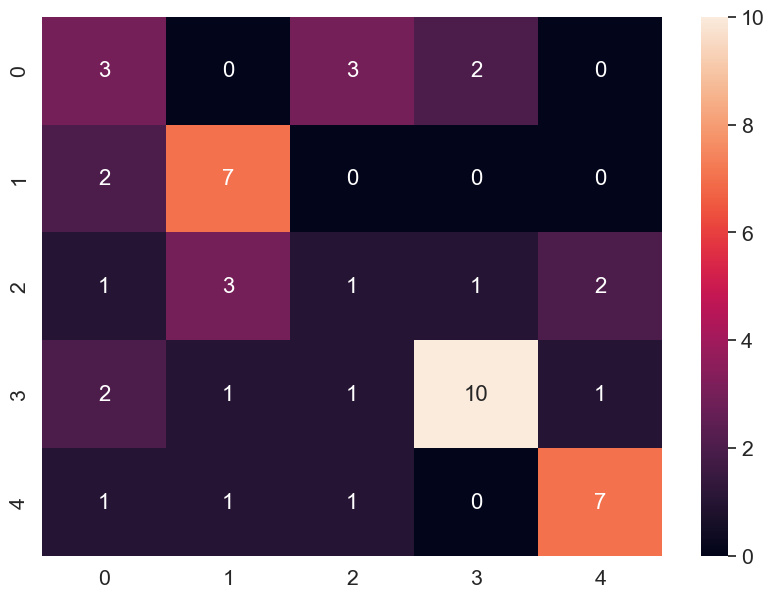

In [88]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)

import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, range(5), range(5))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

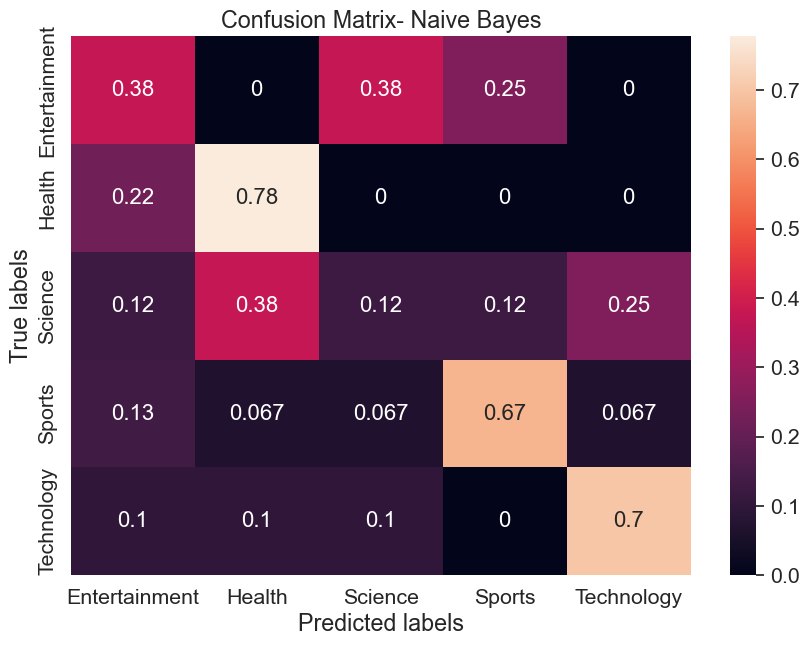

In [89]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,7))
ax= plt.subplot()
sn.set(font_scale=1.4) # for label size
sn.heatmap(cmn, annot=True, annot_kws={"size": 16}) # font size
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Naive Bayes')
ax.xaxis.set_ticklabels(['Entertainment', 'Health','Science','Sports','Technology'])
ax.yaxis.set_ticklabels(['Entertainment', 'Health','Science','Sports','Technology'])
plt.show()


From the Confusion Matrix it is clear that Health labels were predicted accuracy the best with 78% accuracy followed by Technology, sports, Entertainment and Science. 